In [10]:
selected_images = ["../../data/vehicle-type-detection/hatchback/PIC_8.jpg", "../../data/vehicle-type-detection/motorcycle/PIC_58.jpg", "../../data/vehicle-type-detection/suv/PIC_62.jpg"]


Processing image: ../../data/vehicle-type-detection/hatchback/PIC_8.jpg


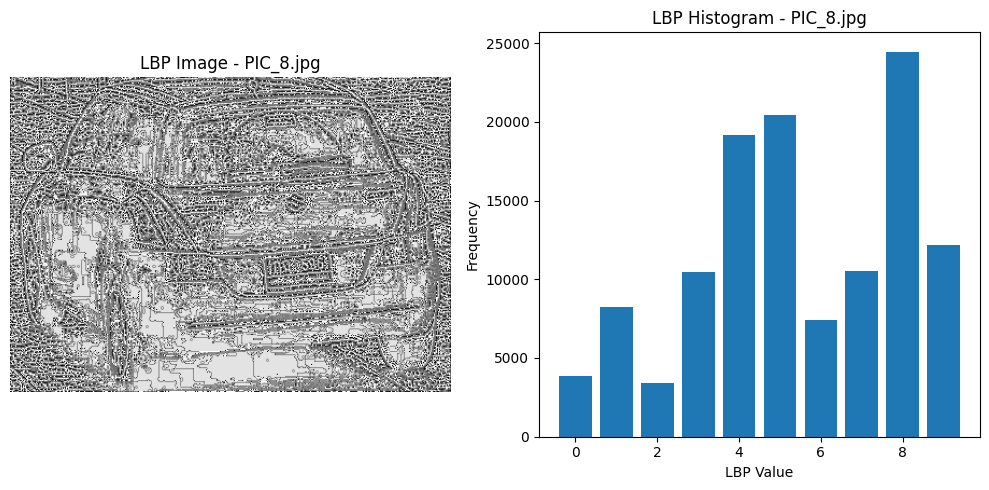

Processing image: ../../data/vehicle-type-detection/motorcycle/PIC_58.jpg


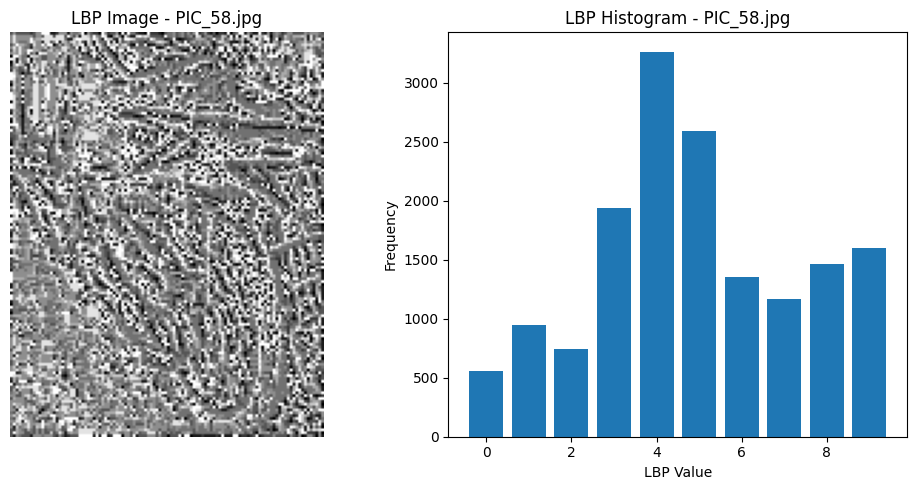

Processing image: ../../data/vehicle-type-detection/suv/PIC_62.jpg


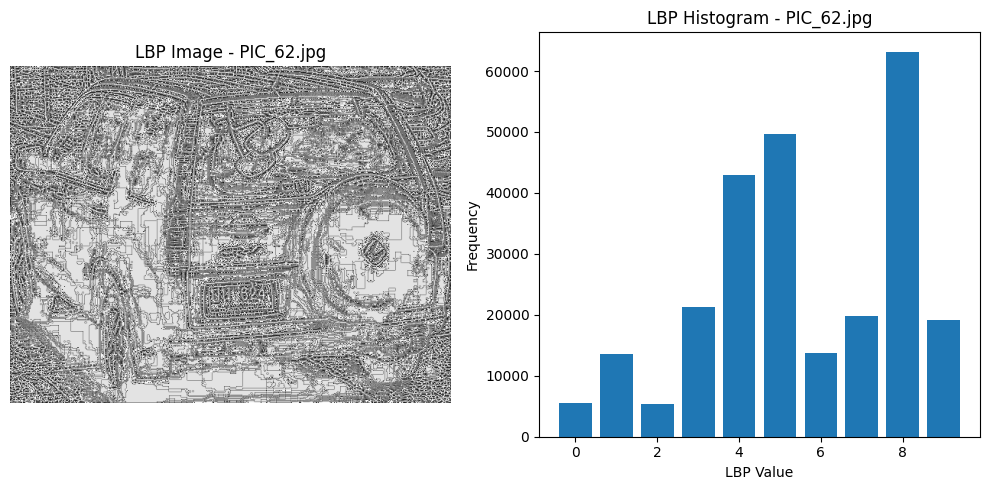

In [11]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

dataset_path = '../../data/vehicle-type-detection/'

# Task 1
def compute_lbp(image, radius=1, n_points=8):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp

# Task 3
def compute_lbp_histogram(lbp_image):
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 11), range=(0, 10))
    return hist

def display_lbp_and_histogram(lbp_image, hist, image_name):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    #LBP
    axs[0].imshow(lbp_image, cmap='gray')
    axs[0].set_title(f'LBP Image - {image_name}')
    axs[0].axis('off')

    #Histogram
    axs[1].bar(range(len(hist)), hist, width=0.8, align='center')
    axs[1].set_title(f'LBP Histogram - {image_name}')
    axs[1].set_xlabel('LBP Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# 3 bilder
def process_images():
    image_paths = selected_images
    
    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is not None:
            print(f"Processing image: {image_path}")
            
            grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            lbp_image = compute_lbp(grayscale_image)
            
            lbp_hist = compute_lbp_histogram(lbp_image)
            
            display_lbp_and_histogram(lbp_image, lbp_hist, os.path.basename(image_path))
        else:
            print(f"Image {image_path} could not be loaded.")

process_images()
